# Heart Disease Risk Exploratory Data Analysis (EDA)

### Introduction

Heart disease remains a major health challenge around the world. In this notebook, we explore a dataset that 
contains information about various lifestyle, medical, and demographic factors related to cardiovascular health. The goal is to understand how these factors may influence the risk of heart disease.

### Aims of the Analysis

To load and clean the dataset for reliable analysis.

To visualize key relationships between variables and heart disease status.

To identify important features that are associated with heart disease.

In [1]:
## Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### LOAD DATA SET

In [3]:
## loading data set and our data sources is from(kagglehub)

heart_disease = "heart_disease.csv"
df = pd.read_csv(heart_disease)

In [4]:
## checking data frame in table format
df

Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0     56.0    Male           153.0              155.0            High     Yes   
1     69.0  Female           146.0              286.0            High      No   
2     46.0    Male           126.0              216.0             Low      No   
3     32.0  Female           122.0              293.0            High     Yes   
4     60.0    Male           166.0              242.0             Low     Yes   
...    ...     ...             ...                ...             ...     ...   
9995  25.0  Female           136.0              243.0          Medium     Yes   
9996  38.0    Male           172.0              154.0          Medium      No   
9997  73.0    Male           152.0              201.0            High     Yes   
9998  23.0    Male           142.0              299.0             Low     Yes   
9999  38.0  Female           128.0              193.0          Medium     Yes   

     Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                     Yes       No  24.991591                 Yes  ...   
1                     Yes      Yes  25.221799                  No  ...   
2                      No       No  29.855447                  No  ...   
3                     Yes       No  24.130477                 Yes  ...   
4                     Yes      Yes  20.486289                 Yes  ...   
...                   ...      ...        ...                 ...  ...   
9995                   No       No  18.788791                 Yes  ...   
9996                   No       No  31.856801                 Yes  ...   
9997                   No      Yes  26.899911                  No  ...   
9998                   No      Yes  34.964026                 Yes  ...   
9999                  Yes      Yes  25.111295                  No  ...   

     High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
0                      No                High       Medium    7.633228   
1                      No              Medium         High    8.744034   
2                     Yes                 Low          Low    4.440440   
3                     Yes                 Low         High    5.249405   
4                      No                 Low         High    7.030971   
...                   ...                 ...          ...         ...   
9995                  Yes              Medium         High    6.834954   
9996                  Yes                 NaN         High    8.247784   
9997                  Yes                 NaN          Low    4.436762   
9998                  Yes              Medium         High    8.526329   
9999                  Yes                High       Medium    5.659394   

      Sugar Consumption Triglyceride Level  Fasting Blood Sugar  CRP Level  \
0                Medium              342.0                  NaN  12.969246   
1                Medium              133.0                157.0   9.355389   
2                   Low              393.0                 92.0  12.709873   
3                  High              293.0                 94.0  12.509046   
4                  High              263.0                154.0  10.381259   
...                 ...                ...                  ...        ...   
9995             Medium              343.0                133.0   3.588814   
9996                Low              377.0                 83.0   2.658267   
9997                Low              248.0                 88.0   4.408867   
9998             Medium              113.0                153.0   7.215634   
9999               High              121.0                149.0  14.387810   

      Homocysteine Level  Heart Disease Status  
0              12.387250                    No  
1              19.298875                    No  
2              11.230926                    No  
3               5.961958                    No  
4               8.153887                    No  
...                  ... 

In [23]:
df.shape

(10000, 21)

In [22]:
## checking the first five columns of data set
df.head()

Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
0  56.0    Male           153.0              155.0            High     Yes   
1  69.0  Female           146.0              286.0            High      No   
2  46.0    Male           126.0              216.0             Low      No   
3  32.0  Female           122.0              293.0            High     Yes   
4  60.0    Male           166.0              242.0             Low     Yes   

  Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                  Yes       No  24.991591                 Yes  ...   
1                  Yes      Yes  25.221799                  No  ...   
2                   No       No  29.855447                  No  ...   
3                  Yes       No  24.130477                 Yes  ...   
4                  Yes      Yes  20.486289                 Yes  ...   

  High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
0                   No                High       Medium    7.633228   
1                   No              Medium         High    8.744034   
2                  Yes                 Low          Low    4.440440   
3                  Yes                 Low         High    5.249405   
4                   No                 Low         High    7.030971   

   Sugar Consumption Triglyceride Level  Fasting Blood Sugar  CRP Level  \
0             Medium              342.0                  NaN  12.969246   
1             Medium              133.0                157.0   9.355389   
2                Low              393.0                 92.0  12.709873   
3               High              293.0                 94.0  12.509046   
4               High              263.0                154.0  10.381259   

   Homocysteine Level  Heart Disease Status  
0           12.387250                    No  
1           19.298875                    No  
2           11.230926                    No  
3            5.961958                    No  
4            8.153887                    No  

[5 rows x 21 columns]

In [24]:
## checking the last five columns of data set

df.tail()

Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
9995  25.0  Female           136.0              243.0          Medium     Yes   
9996  38.0    Male           172.0              154.0          Medium      No   
9997  73.0    Male           152.0              201.0            High     Yes   
9998  23.0    Male           142.0              299.0             Low     Yes   
9999  38.0  Female           128.0              193.0          Medium     Yes   

     Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
9995                   No       No  18.788791                 Yes  ...   
9996                   No       No  31.856801                 Yes  ...   
9997                   No      Yes  26.899911                  No  ...   
9998                   No      Yes  34.964026                 Yes  ...   
9999                  Yes      Yes  25.111295                  No  ...   

     High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
9995                  Yes              Medium         High    6.834954   
9996                  Yes                 NaN         High    8.247784   
9997                  Yes                 NaN          Low    4.436762   
9998                  Yes              Medium         High    8.526329   
9999                  Yes                High       Medium    5.659394   

      Sugar Consumption Triglyceride Level  Fasting Blood Sugar  CRP Level  \
9995             Medium              343.0                133.0   3.588814   
9996                Low              377.0                 83.0   2.658267   
9997                Low              248.0                 88.0   4.408867   
9998             Medium              113.0                153.0   7.215634   
9999               High              121.0                149.0  14.387810   

      Homocysteine Level  Heart Disease Status  
9995           19.132004                   Yes  
9996            9.715709                   Yes  
9997            9.492429                   Yes  
9998           11.873486                   Yes  
9999            6.208531                   Yes  

[5 rows x 21 columns]

In [25]:
## display the data set information 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

# Data Cleaning and Preprocessing

In [56]:
## checking for missing value in the data set
missing_value = df.isnull().sum()
print(missing_value)


Age                       29
Gender                    19
Blood Pressure            19
Cholesterol Level         30
Exercise Habits           25
Smoking                   25
Family Heart Disease      21
Diabetes                  30
BMI                       22
High Blood Pressure       26
Low HDL Cholesterol       25
High LDL Cholesterol      26
Alcohol Consumption     2586
Stress Level              22
Sleep Hours               25
Sugar Consumption         30
Triglyceride Level        26
Fasting Blood Sugar       22
CRP Level                 26
Homocysteine Level        20
Heart Disease Status       0
dtype: int64


In [65]:
## drop row with the any missing values in our data set
df.dropna()

Age  Gender  Blood Pressure  Cholesterol Level Exercise Habits Smoking  \
1     69.0  Female           146.0              286.0            High      No   
2     46.0    Male           126.0              216.0             Low      No   
3     32.0  Female           122.0              293.0            High     Yes   
4     60.0    Male           166.0              242.0             Low     Yes   
5     25.0    Male           152.0              257.0             Low     Yes   
...    ...     ...             ...                ...             ...     ...   
9992  68.0  Female           169.0              291.0          Medium     Yes   
9994  73.0  Female           144.0              191.0          Medium     Yes   
9995  25.0  Female           136.0              243.0          Medium     Yes   
9998  23.0    Male           142.0              299.0             Low     Yes   
9999  38.0  Female           128.0              193.0          Medium     Yes   

     Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
1                     Yes      Yes  25.221799                  No  ...   
2                      No       No  29.855447                  No  ...   
3                     Yes       No  24.130477                 Yes  ...   
4                     Yes      Yes  20.486289                 Yes  ...   
5                      No       No  28.144681                  No  ...   
...                   ...      ...        ...                 ...  ...   
9992                   No       No  22.839718                  No  ...   
9994                  Yes      Yes  39.459620                  No  ...   
9995                   No       No  18.788791                 Yes  ...   
9998                   No      Yes  34.964026                 Yes  ...   
9999                  Yes      Yes  25.111295                  No  ...   

     High LDL Cholesterol Alcohol Consumption Stress Level Sleep Hours  \
1                      No              Medium         High    8.744034   
2                     Yes                 Low          Low    4.440440   
3                     Yes                 Low         High    5.249405   
4                      No                 Low         High    7.030971   
5                      No                 Low       Medium    5.504876   
...                   ...                 ...          ...         ...   
9992                   No              Medium          Low    6.057509   
9994                   No              Medium          Low    7.549114   
9995                  Yes              Medium         High    6.834954   
9998                  Yes              Medium         High    8.526329   
9999                  Yes                High       Medium    5.659394   

      Sugar Consumption Triglyceride Level  Fasting Blood Sugar  CRP Level  \
1                Medium              133.0                157.0   9.355389   
2                   Low              393.0                 92.0  12.709873   
3                  High              293.0                 94.0  12.509046   
4                  High              263.0                154.0  10.381259   
5                   Low              126.0                 91.0   4.297575   
...                 ...                ...                  ...        ...   
9992               High              299.0                142.0   3.321020   
9994             Medium              200.0                 88.0   1.154904   
9995             Medium              343.0                133.0   3.588814   
9998             Medium              113.0                153.0   7.215634   
9999               High              121.0                149.0  14.387810   

      Homocysteine Level  Heart Disease Status  
1              19.298875                    No  
2              11.230926                    No  
3               5.961958                    No  
4               8.153887                    No  
5              10.815983                    No  
...                  ... 

In [52]:
## Rename and editing columns of data set
df = df.rename(columns={'Blood Pressure': 'Blood_Pressure', 'Cholesterol Level': 'Cholesterol_Level',
'Fasting Blood Sugar': 'Fasting_Blood_Sugar','Sleep Hours': 'Sleep_Hours','Exercise Habits': 'Exercise_Habit'})

In [53]:
## checking data frame to comfirm our changes in data set colmuns
df

Age  Gender  Blood_Pressure  Cholesterol_Level Exercise_Habit Smoking  \
0     56.0    Male           153.0              155.0           High     Yes   
1     69.0  Female           146.0              286.0           High      No   
2     46.0    Male           126.0              216.0            Low      No   
3     32.0  Female           122.0              293.0           High     Yes   
4     60.0    Male           166.0              242.0            Low     Yes   
...    ...     ...             ...                ...            ...     ...   
9995  25.0  Female           136.0              243.0         Medium     Yes   
9996  38.0    Male           172.0              154.0         Medium      No   
9997  73.0    Male           152.0              201.0           High     Yes   
9998  23.0    Male           142.0              299.0            Low     Yes   
9999  38.0  Female           128.0              193.0         Medium     Yes   

     Family Heart Disease Diabetes        BMI High Blood Pressure  ...  \
0                     Yes       No  24.991591                 Yes  ...   
1                     Yes      Yes  25.221799                  No  ...   
2                      No       No  29.855447                  No  ...   
3                     Yes       No  24.130477                 Yes  ...   
4                     Yes      Yes  20.486289                 Yes  ...   
...                   ...      ...        ...                 ...  ...   
9995                   No       No  18.788791                 Yes  ...   
9996                   No       No  31.856801                 Yes  ...   
9997                   No      Yes  26.899911                  No  ...   
9998                   No      Yes  34.964026                 Yes  ...   
9999                  Yes      Yes  25.111295                  No  ...   

     High LDL Cholesterol Alcohol Consumption Stress Level Sleep_Hours  \
0                      No                High       Medium    7.633228   
1                      No              Medium         High    8.744034   
2                     Yes                 Low          Low    4.440440   
3                     Yes                 Low         High    5.249405   
4                      No                 Low         High    7.030971   
...                   ...                 ...          ...         ...   
9995                  Yes              Medium         High    6.834954   
9996                  Yes                 NaN         High    8.247784   
9997                  Yes                 NaN          Low    4.436762   
9998                  Yes              Medium         High    8.526329   
9999                  Yes                High       Medium    5.659394   

      Sugar Consumption Triglyceride Level  Fasting_Blood_Sugar  CRP Level  \
0                Medium              342.0                  NaN  12.969246   
1                Medium              133.0                157.0   9.355389   
2                   Low              393.0                 92.0  12.709873   
3                  High              293.0                 94.0  12.509046   
4                  High              263.0                154.0  10.381259   
...                 ...                ...                  ...        ...   
9995             Medium              343.0                133.0   3.588814   
9996                Low              377.0                 83.0   2.658267   
9997                Low              248.0                 88.0   4.408867   
9998             Medium              113.0                153.0   7.215634   
9999               High              121.0                149.0  14.387810   

      Homocysteine Level  Heart Disease Status  
0              12.387250                    No  
1              19.298875                    No  
2              11.230926                    No  
3               5.961958                    No  
4               8.153887                    No  
...                  ...             

In [ ]:
## after dropping missing value from our data set
print("\nAfter dropping missing values:")
df.info()


After dropping missing values:
<class 'pandas.core.frame.DataFrame'>
Index: 7067 entries, 1 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   7067 non-null   float64
 1   Gender                7067 non-null   object 
 2   Blood Pressure        7067 non-null   float64
 3   Cholesterol Level     7067 non-null   float64
 4   Exercise Habits       7067 non-null   object 
 5   Smoking               7067 non-null   object 
 6   Family Heart Disease  7067 non-null   object 
 7   Diabetes              7067 non-null   object 
 8   BMI                   7067 non-null   float64
 9   High Blood Pressure   7067 non-null   object 
 10  Low HDL Cholesterol   7067 non-null   object 
 11  High LDL Cholesterol  7067 non-null   object 
 12  Alcohol Consumption   7067 non-null   object 
 13  Stress Level          7067 non-null   object 
 14  Sleep Hours           7067 non-null   float64

## EXPLANATORY DATA ANALYSIS (EDA)

In [29]:
## Summary statistic of our data set for numeric columns
print('Summary statistics for numeric columns:')
display(df.describe())

Summary statistics for numeric columns:


Age  Blood_Pressure  Cholesterol_Level          BMI  \
count  9971.000000     9981.000000        9970.000000  9978.000000   
mean     49.296259      149.757740         225.425577    29.077269   
std      18.193970       17.572969          43.575809     6.307098   
min      18.000000      120.000000         150.000000    18.002837   
25%      34.000000      134.000000         187.000000    23.658075   
50%      49.000000      150.000000         226.000000    29.079492   
75%      65.000000      165.000000         263.000000    34.520015   
max      80.000000      180.000000         300.000000    39.996954   

       Sleep_Hours  Triglyceride Level  Fasting_Blood_Sugar    CRP Level  \
count  9975.000000         9974.000000          9978.000000  9974.000000   
mean      6.991329          250.734409           120.142213     7.472201   
std       1.753195           87.067226            23.584011     4.340248   
min       4.000605          100.000000            80.000000     0.003647   
25%       5.449866          176.000000            99.000000     3.674126   
50%       7.003252          250.000000           120.000000     7.472164   
75%       8.531577          326.000000           141.000000    11.255592   
max       9.999952          400.000000           160.000000    14.997087   

       Homocysteine Level  
count         9980.000000  
mean            12.456271  
std              4.323426  
min              5.000236  
25%              8.723334  
50%             12.409395  
75%             16.140564  
max             19.999037

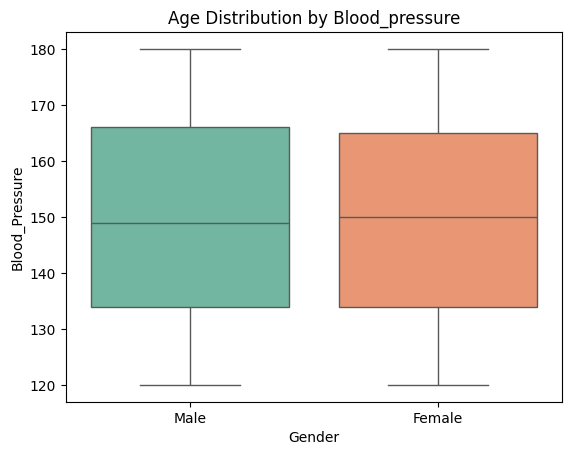

<Figure size 1500x900 with 0 Axes>

In [ ]:
## Gender Distribution by Blood_pressure
sns.boxplot(data=df, x='Gender', y='Blood_Pressure', palette='Set2')
plt.title('Gender Distribution by Blood_pressure')
plt.figure(figsize=(15, 9))
plt.show()


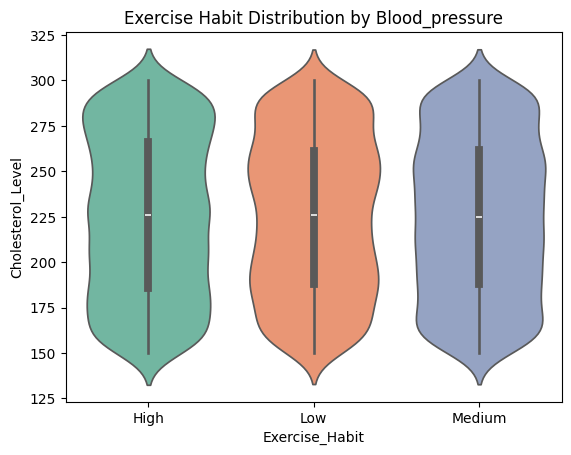

<Figure size 1500x900 with 0 Axes>

In [ ]:
## Exercise Habit Distribution by Blood_pressure
sns.violinplot(data=df, x='Exercise_Habit', y='Cholesterol_Level', palette='Set2')
plt.title('Exercise Habit Distribution by Blood_pressure')
plt.figure(figsize=(15, 9))
plt.show()

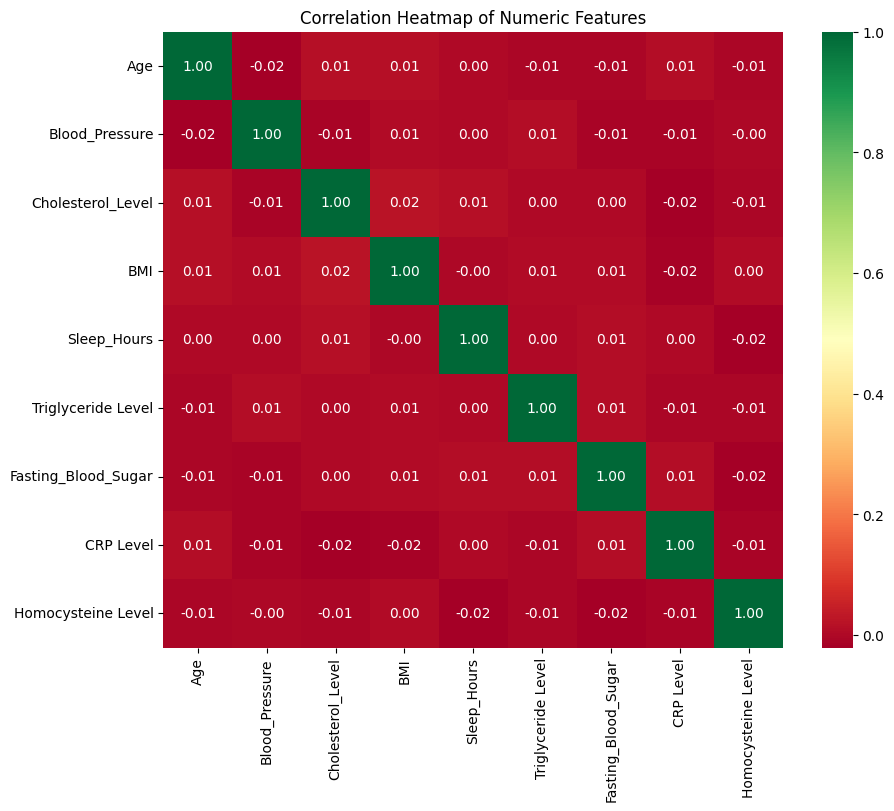

In [47]:
# Create a correlation heatmap of numeric variables if there are four or more numeric columns
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    sns.heatmap(numeric_df.corr(), annot=True, cmap='RdYlGn', fmt='.2f') 
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()

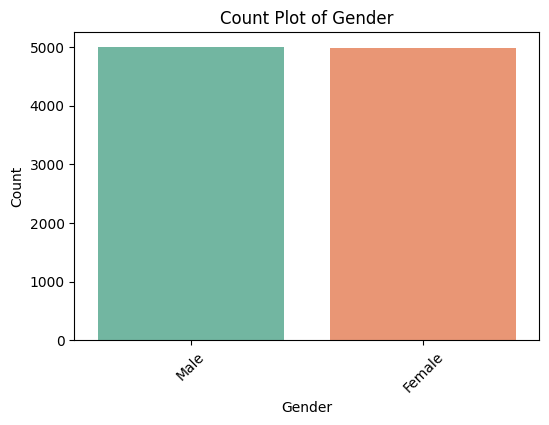

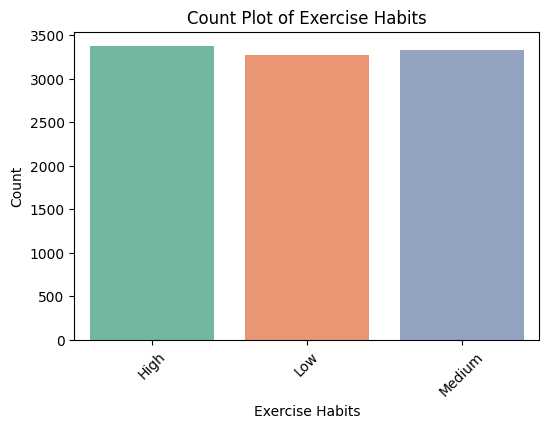

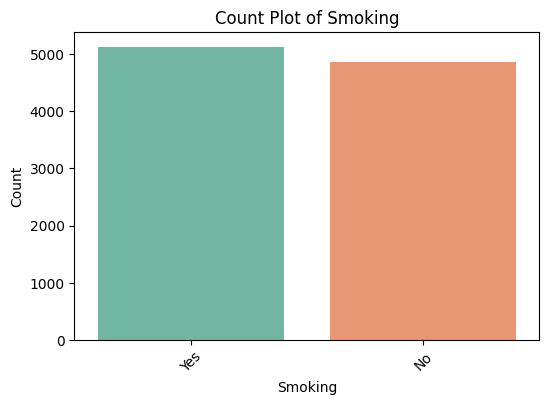

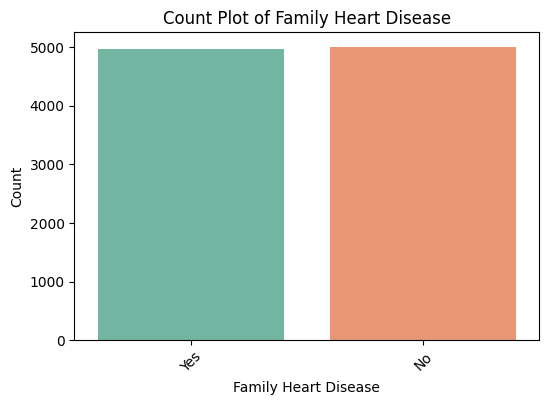

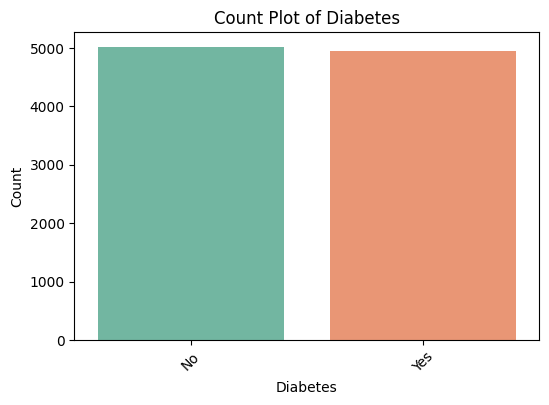

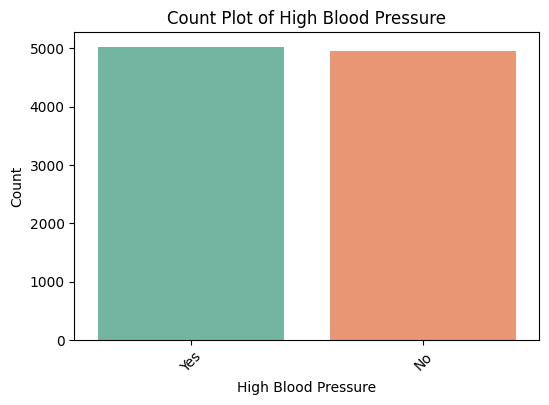

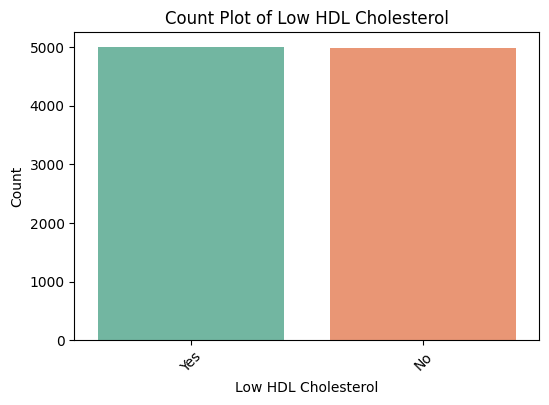

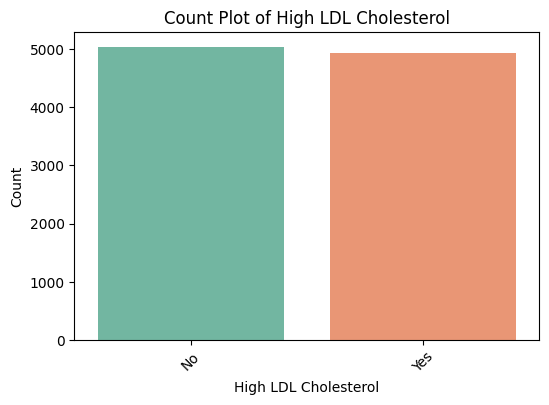

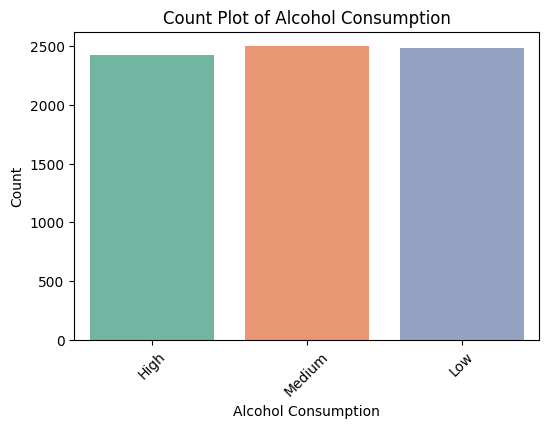

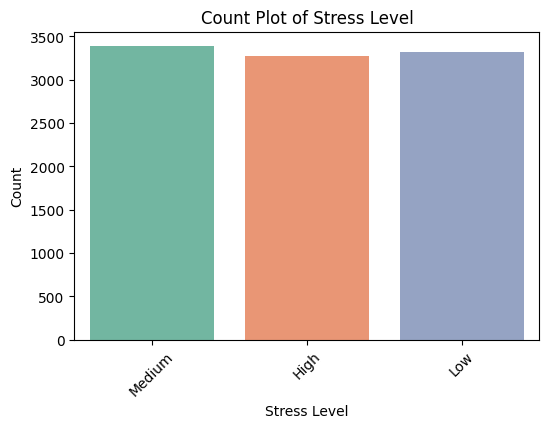

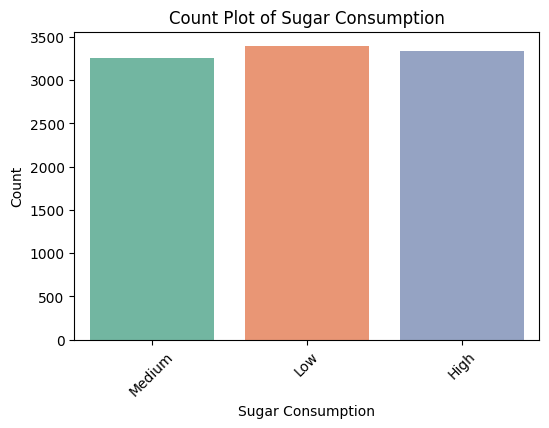

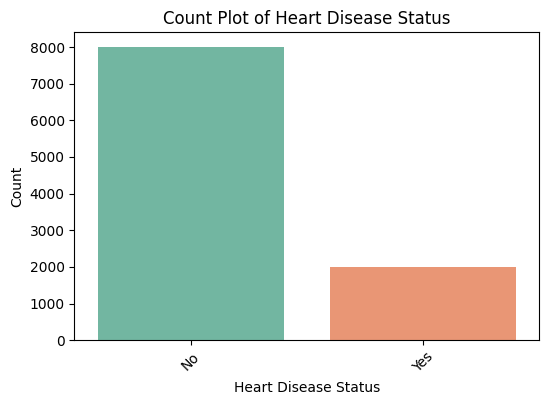

In [13]:
# For categorical variables, display count plots of all the
import warnings
warnings.filterwarnings('ignore')

categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

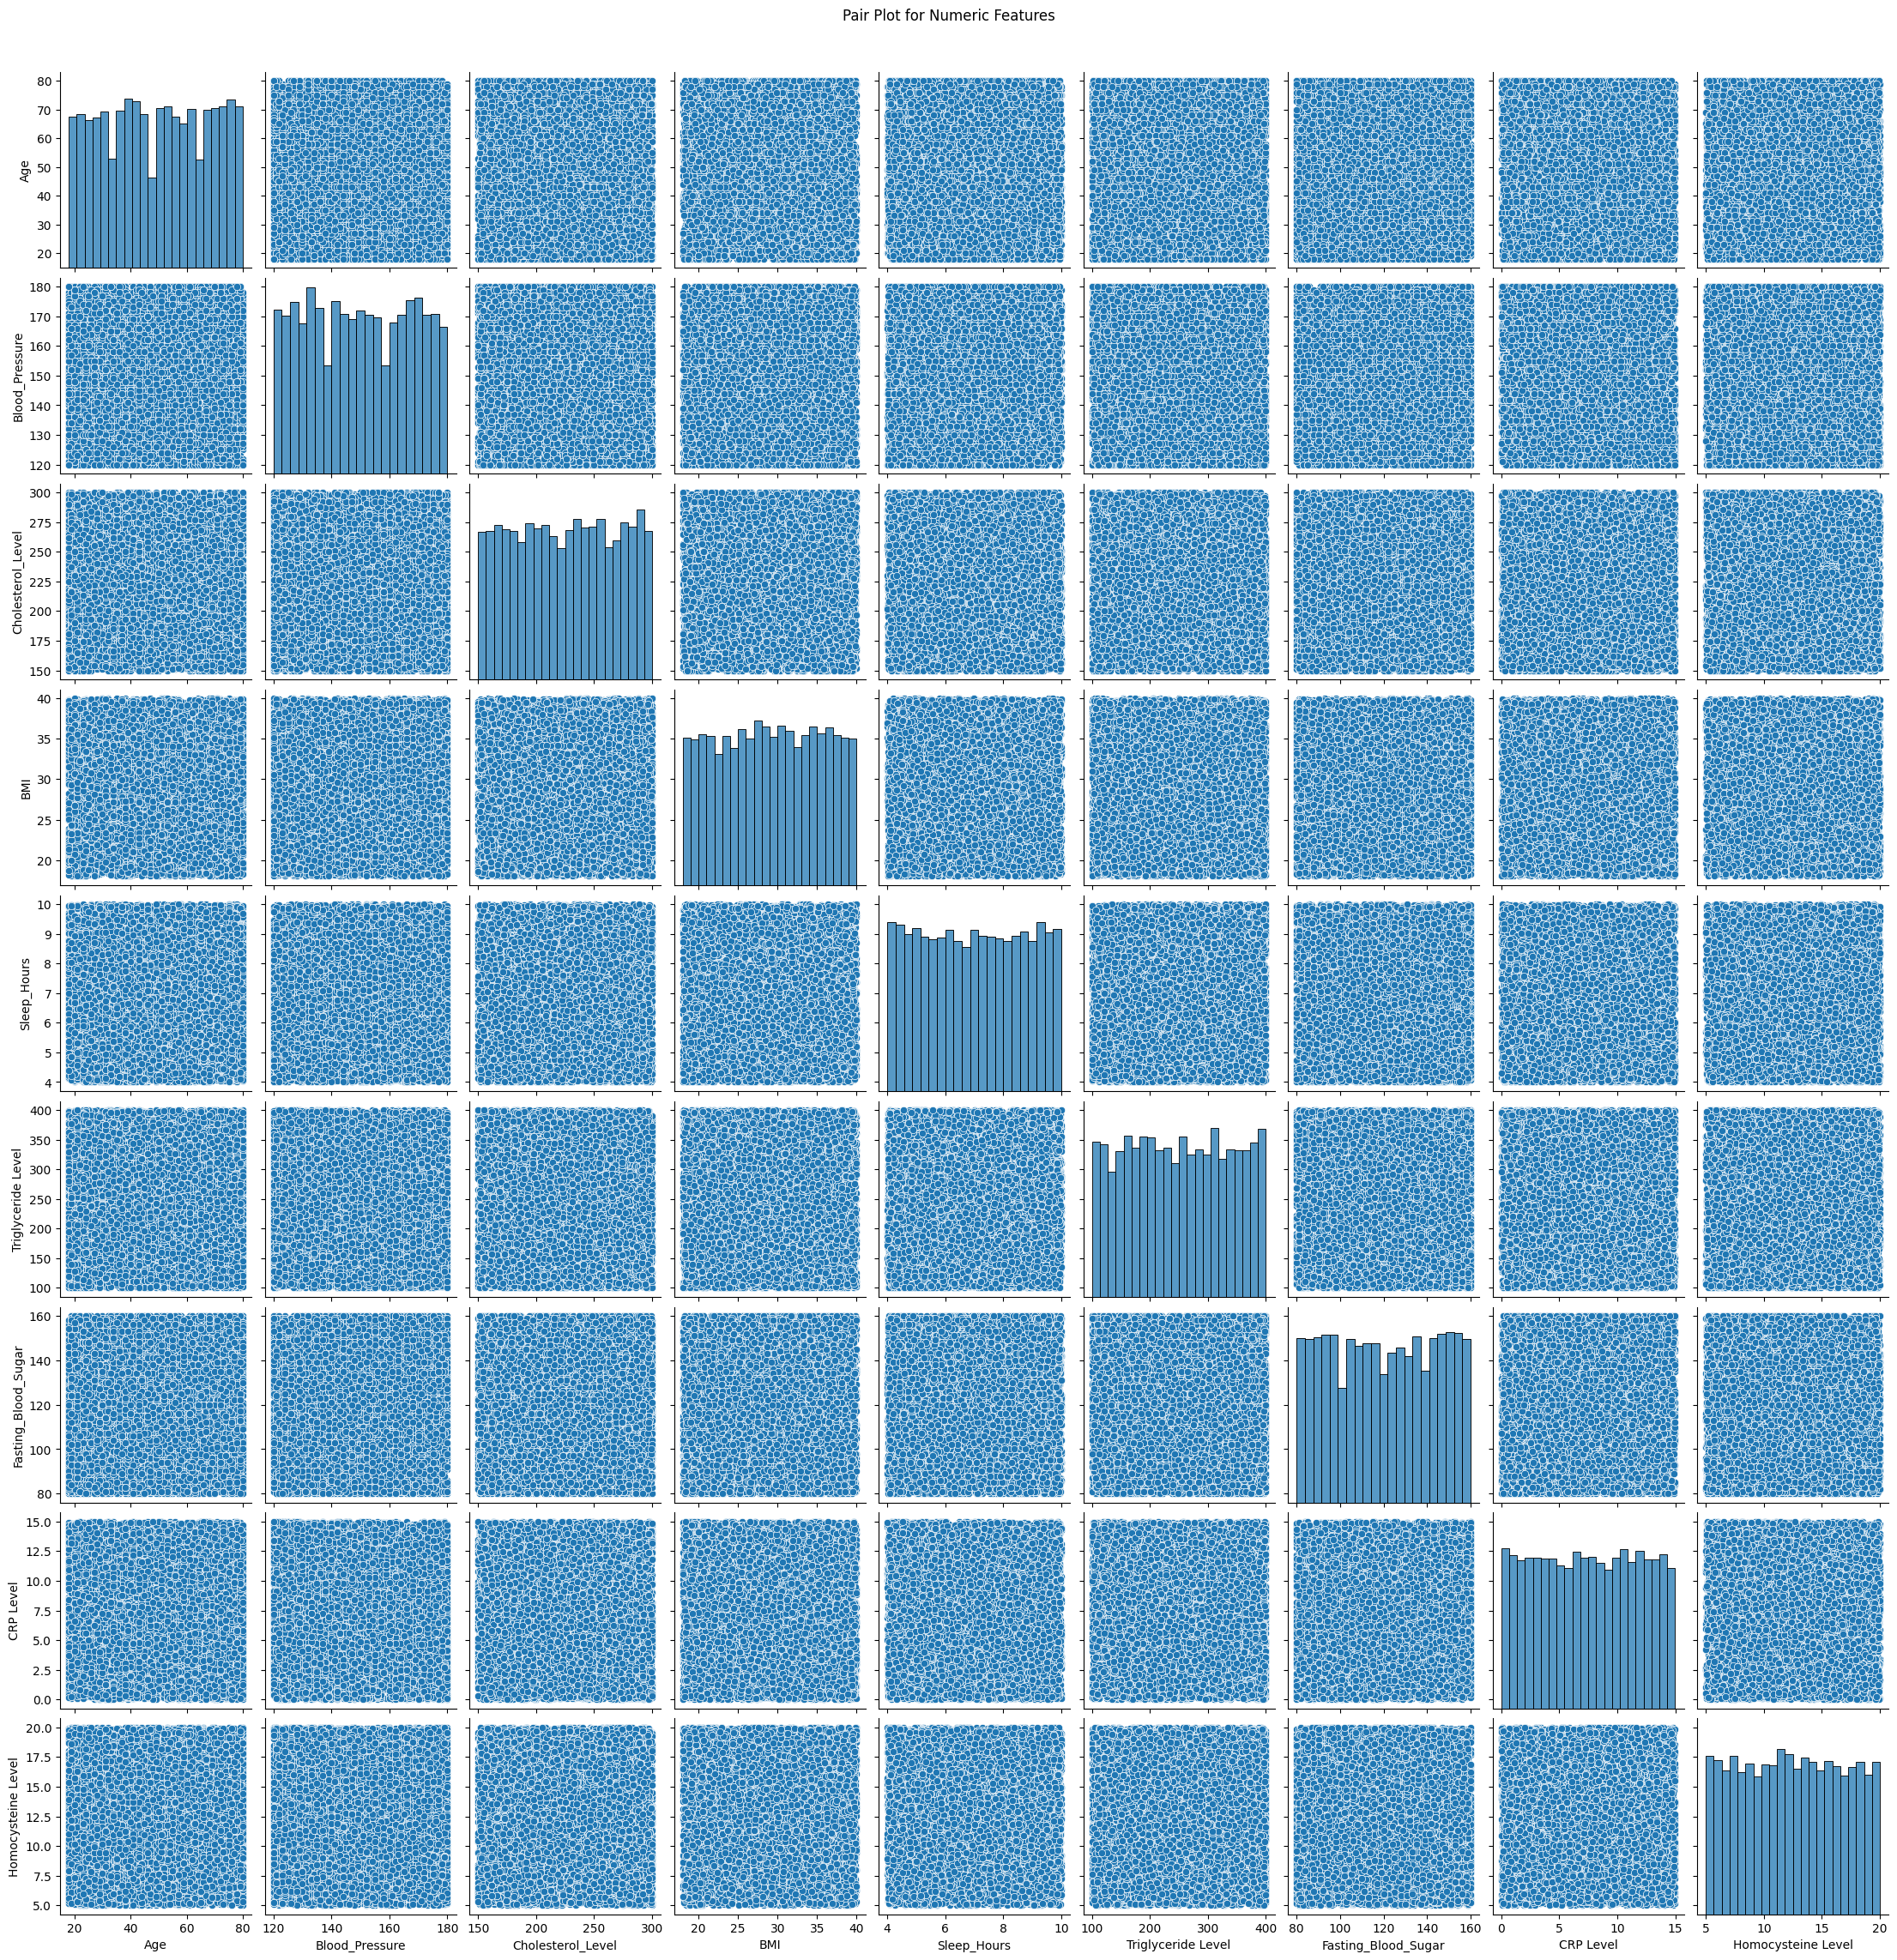

In [59]:
# Create pair plot for numeric variables to examine distributions and relationships
sns.pairplot(numeric_df)
plt.suptitle('Pair Plot for Numeric Features', y=1.02)
plt.show()

## Summary of Findings

Through this analysis, we observed that certain features such as age, gender, chest pain type, blood pressure,cholestorel level, sleep hours and excercise habit, maximum heart rate achieved,examine distribution relationship between variables,correlation between the variables  with color indicators red for negative correlation, green for positive correlation. and resting blood pressure showed notable differences between patients with and without heart disease. Visualizations helped in identifying patterns and potential risk factors.

This notebook provides a basic framework for understanding the data and sets a foundation for future improvements, such as using more advanced models or exploring deeper feature interactions.



## Conclusion

In this notebook, we analyzed a heart disease dataset by cleaning the data, exploring feature relationships, and building a basic classification model. The analysis showed that some features—like age, chest pain type, cholesterol levels, and maximum heart rate—may help in identifying individuals at risk of heart disease.

We used visual tools such as count plots, boxplots, and correlation heatmaps to better understand the patterns in the data.